________________
<h1 align="center"><span style='font-family:Georgia'> PRODUCT RATING PREDICTION </span></h1>

_________________

### **Author**: Heba Mohamed Abdelmonam Mahmoud 
### **Date**:  18-03-2023
### **email**: hebamohamed14101998@gmail.com
----
### **Problem Statement:**
The rise in e-commerce has brought a significant increase in the importance of customer reviews. There are hundreds of online review sites and massive reviews for every product. 

When you have a new product to be put on wish.com, you can estimate how likely people will like your product, without actually listing out there. It also allows us to understand what conditions will make a product highly rated on wish.com, as a way of understanding their customer base.

### **Notebook Description**:  
This notebook is intended to predict the product ratings given the other features known for a product on `Wish.com`. Ratings are in categories from 1 to 5. For one product, the higher the rating is, the more the customers like the product. It used 4 diffrent algorithms with 3 diffrent data cpmbinations.

### **Dataset Description:**

### **Methodology:**
 <img src='https://www.odinschool.com/hs-fs/hubfs/Lifecycle%2001-1.png?width=588&height=588&name=Lifecycle%2001-1.png'>
 
### **Deliverable:**
 A python notebook containing the documentation of the final design as well as the answers to the questions.




_________________


<h1 align="center"><span style='font-family:Georgia'>TABLE OF CONTENTS </span></h1>

_________________

* Setup
  - Import Dependencies

* Load Dataset
  - Dataset Overview

* Data Cleaning
  - Removing Duplicates 
  - Remove Irrelevant Data
  - Handle Missing Values

* Exploratory Data Analysis (EDA)
  - Check Feature Correlation
  - Comparasion between `Price` and `Retail_price`
  - Exploring Color column
  - Correlation between `units sold` and 'rating`
  - Effect of `ad boosts` on `rating`
  - Correlation between badges, sold units, and rating columns
  - shipping options analysis
  - Merchant profil Analysis
  - Inventory columns Analysis
  - Tag Word Cloud

* Feature Engineering  
  - Handling Color Feature
  - Handling Size Variation Feature
  - Handling Origin Country Feature
  - Handling Merchant info Feature
  - Handling Urgency text Feature
  - Drop Some Feature


* Prepare Data For Machine Learning 
  - Encoding Categorical Features
  - Data Normalization
  - Check Data Distribution After prcessing
  - Handling Merchant info Feature

* Data Modeling
  - Decsion Tree Classifier
  - Support Vector Classifier 
  - Naive Bayes Classifier  

* Save Submission file
* Conclusion
* Questions





_________________
<h1 align="center"><span style='font-family:Georgia'>  SETUP</span></h1>

_________________


In [1]:

import re
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', 100)

######################## for creating graphs ################
import plotly.express as px
import seaborn as sns
import matplotlib as mt
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

######################## for modeling ########################
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


In [2]:

# from bokeh.io import output_notebook 
# output_notebook()
mystyle = plt.style.library['fivethirtyeight']
# sns.set(rc={"figure.figsize":(9,6)})

  
# using the style for the plot
# %pylab inline
# plt.rc('figure', figsize=(12,9))
# colors = sns.color_palette()
# plt.style.use('fivethirtyeight')



_________________
<h1 align="center"><span style='font-family:Georgia'> Load Dataset </span></h1>
_________________


In [3]:

train_data = pd.read_csv('train_new.csv')
test_data = pd.read_csv('test_new.csv')

train_data.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [4]:
id_col = test_data['id']

### **1.1 Dataset Overview**

**Information about the attributes**

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

In [6]:
train_data.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,349.0,1.094000e+03,1094.000000,1094.000000,1094.000000
mean,8.320786,23.712066,4518.661792,0.432358,4.006399,915.523766,0.114260,0.019196,0.083181,0.011883,32.807130,2.344607,0.002742,40.484461,49.849177,1.0,2.678399e+04,4.036191,0.155393,772.207495
std,4.027448,31.802661,9825.608568,0.495630,0.585706,2037.561158,0.348461,0.137275,0.276282,0.108409,21.454655,1.044781,0.052318,20.196229,2.480687,0.0,8.616171e+04,0.200397,0.362445,453.784430
min,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000,1.0,4.000000e+00,2.941176,0.000000,2.000000
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.926000e+03,3.918464,0.000000,382.250000
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,143.500000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,8.225000e+03,4.045170,0.000000,752.500000
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,845.500000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.306200e+04,4.166826,0.000000,1166.500000
max,49.000000,252.000000,100000.000000,1.000000,6.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,4.577519,1.000000,1572.000000


**Data shape (Number of variable and observation)**

In [7]:
train_data.shape

(1094, 34)

_________________
<h1 align="center"><span style='font-family:Georgia'>Data Cleaning</span></h1>

_________________

### **2.1 Remove Duplicate Rows**

In [9]:
train_data.duplicated().sum()

0

In [10]:
print("Duplicate product_id :",train_data['id'].duplicated().sum())

Duplicate product_id : 0


> **OBSERVATION**:
- No duplication 


### **2.2 Remove Irrelevant Data**



#### **2.2.1 Check Unique Values**


In [11]:
def CheckConstantCol(df, n_unique=100):

  ones = {}
  for col in df.columns: 
    n = len(df[col].unique())
    if n == 1:
      ones[col] = n

  return ones

In [12]:
constants = CheckConstantCol(train_data)
print('Variables With One Unique Value:\n', list(constants.keys()))

Variables With One Unique Value:
 ['currency_buyer', 'theme', 'crawl_month']


> **OBSERVATION**
- Features with single values: **drop** them.
  - currency_buyer
  - theme
  - crawl_month


In [13]:
train_data.id.nunique()

1094

In [14]:
train_data.shipping_option_name.value_counts()

Livraison standard         1047
Standard Shipping            16
Envio Padrão                  6
الشحن القياسي                 4
Expediere Standard            4
Envío normal                  3
Standardversand               3
Livraison Express             3
Standardowa wysyłka           2
Standart Gönderi              2
Стандартная доставка          2
Spedizione standard           1
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: shipping_option_name, dtype: int64

> **OBSERVATION**:
- **`id`**: all the cells is unique. As a result, **drop** it. 
- **`shipping_option_name`** is imbalanced feature, as a result, **drop** them.  
- Features with many unique values: **drop** them. 
  - merchant_title
  - merchant_name
  - merchant_id
  - merchant_profile_picture
  - merchant_has_profile_picture

#### **2.2.2 Drop irrelevant variable**

In [15]:
print('Dataset shape before merchant_has_profile_picture columns',train_data.shape)

droped_cols = ['currency_buyer','shipping_is_express', 'merchant_has_profile_picture', 'theme', 'crawl_month','id',
                'merchant_title', 'merchant_name', 'merchant_id', 'merchant_profile_picture','shipping_option_name']
df1 = train_data.drop(droped_cols, axis = 1)

print('Dataset shape after dropping columns',df1.shape)

Dataset shape before merchant_has_profile_picture columns (1094, 34)
Dataset shape after dropping columns (1094, 23)


In [16]:
test_data = test_data.drop(droped_cols, axis = 1)

### **2.3 Handling Missing Values**  

In [17]:
def CheckMissing(df):
  for col in df.columns:

    s = df[col].isna().sum()
    per= (df[col].isna().sum()/df[col].shape[0])*100
    if s > 0:
        print("column: {:30s} Nulls: {:6d} {:15s} Precentage: {:2.2f}%".format(col,s,'',per))

In [18]:
CheckMissing(df1)

column: product_color                  Nulls:     29                 Precentage: 2.65%
column: product_variation_size_id      Nulls:     12                 Precentage: 1.10%
column: has_urgency_banner             Nulls:    745                 Precentage: 68.10%
column: urgency_text                   Nulls:    745                 Precentage: 68.10%
column: origin_country                 Nulls:     12                 Precentage: 1.10%


In [19]:
CheckMissing(test_data)

column: product_color                  Nulls:     12                 Precentage: 2.51%
column: product_variation_size_id      Nulls:      2                 Precentage: 0.42%
column: has_urgency_banner             Nulls:    355                 Precentage: 74.11%
column: urgency_text                   Nulls:    355                 Precentage: 74.11%
column: origin_country                 Nulls:      5                 Precentage: 1.04%
column: merchant_info_subtitle         Nulls:      1                 Precentage: 0.21%


> **OBSERVATION**
- Percentage of missing cells in **`product_color`,`product_variation_size_id`,`origin_country`** is low, but i will try to replaced them by **Most Frequent Category.**

In [20]:
df1.urgency_text.value_counts()

Quantité limitée !                  348
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [21]:
df1.has_urgency_banner.unique()

array([nan,  1.])

#### **2.3.1 Replace null by 'others'**

In [22]:
df2 = df1
df2[['product_color', 'product_variation_size_id']] = df2[['product_color', 'product_variation_size_id']]\
                                                      .apply(lambda col: col.fillna('others') )

In [23]:
test_data[['product_color', 'product_variation_size_id']] = test_data[['product_color', 'product_variation_size_id']]\
                                                      .apply(lambda col: col.fillna('others') )

#### **2.3.2 Replace null by 0**

In [24]:
# training dataset
df2.fillna({'origin_country':0,'has_urgency_banner':0, 'urgency_text':0}, inplace=True)
# testing dataset
test_data.fillna({'origin_country':0,'has_urgency_banner':0, 'urgency_text':0}, inplace=True)

In [25]:
df2.isna().sum().sum()

0

#### **2.3.3 Handling Outcome column (rating)**

In [26]:
df2.rating.value_counts()

4.0    774
5.0    170
3.0    135
2.0     12
1.0      2
6.0      1
Name: rating, dtype: int64

#### **2.3.4 Delete Rate 6 row**

In [27]:
df2.rating.value_counts()
df2.drop(df2[df2.rating == 6].index, axis = 0, inplace = True)
df2.rating.value_counts()

4.0    774
5.0    170
3.0    135
2.0     12
1.0      2
Name: rating, dtype: int64

In [28]:
df2[df2.rating_count == 0][['rating','rating_count']]

,rating,rating_count
66,5.0,0
99,5.0,0
113,5.0,0
149,5.0,0
181,5.0,0
240,5.0,0
243,5.0,0
249,5.0,0
254,5.0,0
276,5.0,0


> **OBSERVATION**: Why rating = 5 when rating count = 0 ??!!

_________________
<h1 align="center"><span style='font-family:Georgia'> Data Exploratory Analysis(EDA)</span></h1>

_________________



1. How different is the 'price' from 'retail price' and what is the effect of the difference. 
2. Does having ad boosts increase success? 

3. Any correlation between units sold and ratings?

4. What is badges? What is the corrlation between badges columns? 

5. Do success with increase in number of badges?

6. Shipping options analysis

7. Analysis of merchant profile

8. Analysis of inventory total and units sold.

9. Show tags Word Cloud





## **3.1 Check Featues Correlation**

In [29]:
corr_df = df2.corr()

In [30]:
# Draw heatmap using plolty

import plotly.figure_factory as ff
mask = np.triu(np.ones_like(corr_df, dtype=bool))
df_mask = corr_df.mask(mask)

hmap = ff.create_annotated_heatmap(z=np.around(df_mask.to_numpy(),2), 
                                  x=df_mask.columns.tolist(),
                                  y=df_mask.columns.tolist(),
                                  colorscale=px.colors.diverging.RdBu,
                                  showscale=True, ygap=1, xgap=1
                                 )

hmap.update_xaxes(side="bottom")
hmap.update_layout(
    title_text='Feature Correlation Heatmap'.upper(), 
    width=1200, 
    height=1000,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white'
)
for i in range(len(hmap.layout.annotations)):
    hmap.layout.annotations[i].font.size = 12
    hmap.layout.annotations[i].font.color = 'black'
    
    if hmap.layout.annotations[i].text == 'nan':
        hmap.layout.annotations[i].text = ""
hmap.show()

> **OBSERVATION**: Most columns have ouliers

## **3.2 Comparison between price and retail price**

Retail price is used by the seller to indicate a regular value or the price before discount. 
- How do diffrence between price and retail price define the product success?

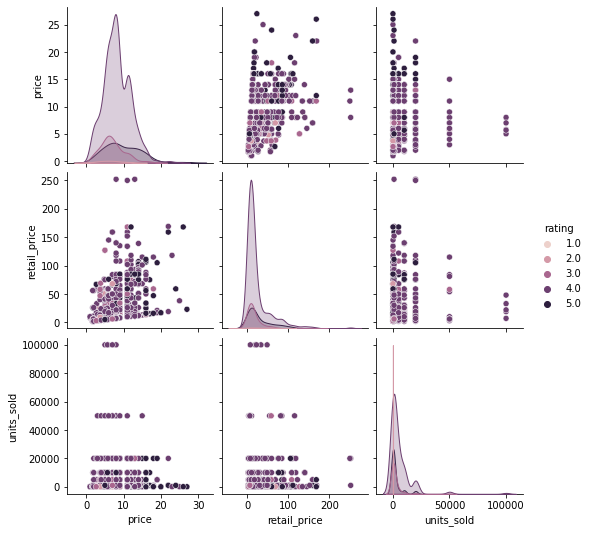

In [31]:
sns.pairplot(df2[['price','retail_price','units_sold','rating']], hue='rating')

In [32]:

sns.set(rc={"figure.figsize":(9,6)})

g = px.box(df2[['price','retail_price']],points='all',width=800, height=800)
g.update_traces(marker=dict(color='purple'), )
g.show()


> **OBSERVATION**:There is a visible downward trend in units sold as the price increases. Products with high sales are usually concentrated in the price range of 0-20.

In [33]:
g = px.scatter(df2,x='retail_price',y='price', marginal_y ='box',title='Retail Price vs Price',width=1000, height=800)
g.update_traces(marker=dict(color='purple'))
g.show()

### **3.2.1 Create new Feature called discount percent**

$discount = (retail price - price)/retail price$


In [34]:
df2['discount_percent']=(df2["retail_price"]-df2["price"])/df2["retail_price"]
df2[df2['discount_percent'] < 0][['price', "retail_price",'discount_percent']]

,price,retail_price,discount_percent
0,8.00,7,-0.142857
1,8.00,7,-0.142857
3,4.67,4,-0.167500
7,8.00,7,-0.142857
8,9.00,8,-0.125000
...,...,...,...
1085,8.00,7,-0.142857
1086,13.00,11,-0.181818
1088,8.00,7,-0.142857
1092,11.00,10,-0.100000


> **OBSERVATION**: Some items have retail price less than acual price!!!

In [35]:
test_data['discount_percent']=(test_data["retail_price"]-test_data["price"])/test_data["retail_price"]
test_data[test_data['discount_percent'] < 0][['price', "retail_price",'discount_percent']]

,price,retail_price,discount_percent
0,5.75,5,-0.150000
6,5.73,5,-0.146000
10,9.00,8,-0.125000
11,9.00,8,-0.125000
12,5.79,5,-0.158000
...,...,...,...
464,8.00,7,-0.142857
466,8.00,7,-0.142857
473,8.00,7,-0.142857
474,16.00,14,-0.142857


In [36]:
g = px.scatter(df2, y='units_sold', x='discount_percent',marginal_y='box', title='Dicount percent vs Units Sold',width=800, height=700)
g.update_traces(marker=dict(color='purple'))
g.show()

> **OBSERVATION**:

- There is a high positive correlation between **price and retail price**
- No correlation between **price and units sold**
- items with high **price** has retavily low units sold and low rating counts.
- when **price < retail price**, the unit sold should has low value.

## **3.4 Sales comparison by colors**
 - Find out the ten most popular colors by sorting out units sold.
 - Find out the ten most repeated color in the dataset.

In [37]:
colors=df2['product_color'].value_counts(ascending = False)

fig=px.bar(data_frame=colors.head(10),width=800, height=400)
fig.update_layout(title='Top 10 common colors')
fig.show()

In [38]:
color_sale=df2.groupby('product_color')['units_sold'].sum()
color_sale=color_sale.reset_index().sort_values(by='units_sold',ascending=False)

fig=px.bar(data_frame=color_sale.head(10),x='product_color',y='units_sold',width=800, height=400)
fig.update_layout(title='Top 10 color sales')
fig.show()

> **OBSERVATION**:

- Most common colors in the dataset is **black** and **white** have the highest sold items.

In [39]:
fig=px.bar(data_frame=color_sale,x='product_color',y='units_sold')
fig.update_layout(title='All color sales')
fig.show()

> **OBSERVATION**: Some Spasific colors have high sold units

## **3.5 Correlation between units sold and Ratings**

In [40]:
g = px.scatter(df2,x='rating',y='units_sold', marginal_y ='box',title='Measure successful product by sold units', width = 800, height = 600)
g.update_traces(marker=dict(color='purple'))
g.show()

> **OBSERVATION**: Products with sales more than 20k pices are successfull products (have > 3 rating)

## **3.6 Effect of ad boosts of ratings.**

In [41]:
g = px.box(df2,x='uses_ad_boosts',y='rating_count',color='rating',width=1200, height=600)

g.update_layout(boxmode='group',
                  title='Relations between ad boosts and rating',
                  xaxis = dict(tickvals = [0,1],
                  ticktext = ['Without add boosts','With add boosts']))


> **OBSERVATION**:surprisingly, produsts without add boosts gain higher number of ratings on average, the same

## **3.7 Relation Between the Badages , sold units and Rating**


**What is badges? What is the corrlation between badges columns?**

**Do success with increase in number of badges?**

<Figure size 1440x1440 with 0 Axes>

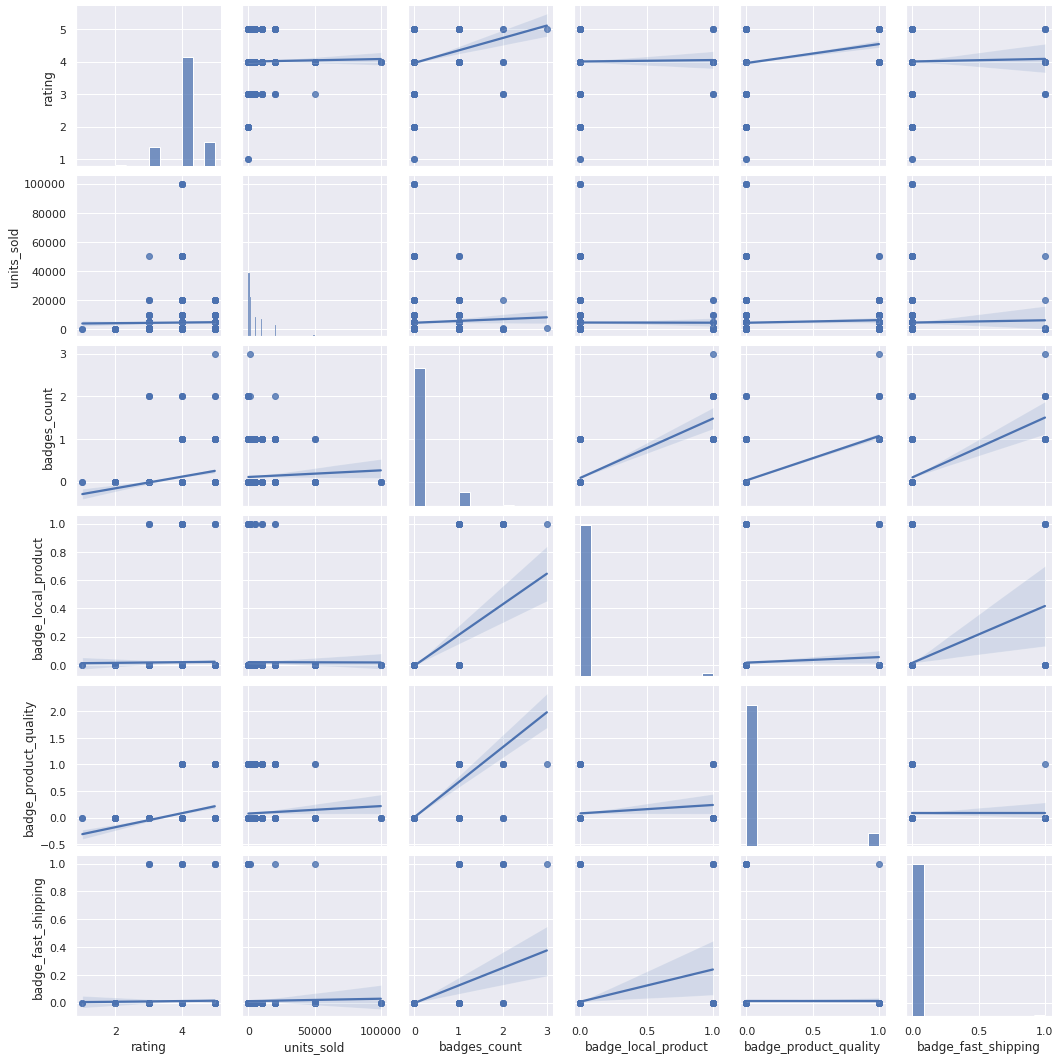

In [42]:
badges_cmp=df2[['rating','units_sold','badges_count','badge_local_product','badge_product_quality','badge_fast_shipping']]
plt.figure(figsize=(20,20))
sns.pairplot(data=badges_cmp,kind='reg')
plt.show()

> **OBSERVATION**: 
- The number of badges or any kind of badge doesn't affect much the rating.

## **3.8 Shipping options analysis**

<Figure size 1440x1440 with 0 Axes>

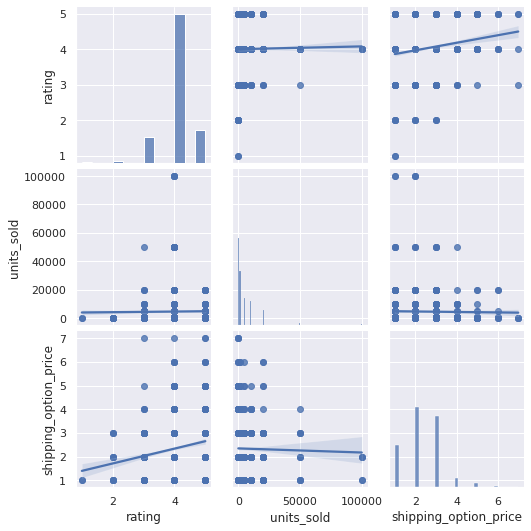

In [43]:
plt.figure(figsize=(20,20))
sns.pairplot(data=df2[['rating','units_sold','shipping_option_price']],kind='reg')
plt.show()

## **3.9  Analysis of merchant profile**

In [44]:
df2['merchant_rating'].describe()

count    1093.000000
mean        4.036020
std         0.200409
min         2.941176
25%         3.918367
50%         4.045170
75%         4.166509
max         4.577519
Name: merchant_rating, dtype: float64

In [45]:
merchant = df2.copy()
bins = [2.9, 3.5, 4.0, np.inf]
cats1 = pd.cut(merchant['merchant_rating'],bins)
merchant['merchant_raing_cats']=cats1

bins2 = [0, 250000, 900000, np.inf]
cats2 = pd.cut(merchant['merchant_rating_count'],bins2)
merchant['raing_count_cats']=cats2

In [46]:
merchant_sales = merchant.groupby(['merchant_raing_cats','raing_count_cats'])['units_sold'].sum()\
                               .nlargest(10).reset_index()
merchant_sales

,merchant_raing_cats,raing_count_cats,units_sold
0,"(4.0, inf]","(0.0, 250000.0]",3278050
1,"(3.5, 4.0]","(0.0, 250000.0]",1238066
2,"(4.0, inf]","(250000.0, 900000.0]",415000
3,"(4.0, inf]","(900000.0, inf]",10000
4,"(2.9, 3.5]","(0.0, 250000.0]",2200
5,"(2.9, 3.5]","(250000.0, 900000.0]",0
6,"(2.9, 3.5]","(900000.0, inf]",0
7,"(3.5, 4.0]","(250000.0, 900000.0]",0
8,"(3.5, 4.0]","(900000.0, inf]",0


> **OBSERVATION**:
the majority have number of ratings less than 250,000, mean ratings above 4.0 and have profile picture.

In [47]:
merchant_sales = merchant.groupby(['merchant_raing_cats','raing_count_cats'])['rating'].mean()\
                               .nlargest(10).reset_index()
merchant_sales

,merchant_raing_cats,raing_count_cats,rating
0,"(4.0, inf]","(900000.0, inf]",5.000000
1,"(4.0, inf]","(0.0, 250000.0]",4.063863
2,"(3.5, 4.0]","(0.0, 250000.0]",3.934426
3,"(4.0, inf]","(250000.0, 900000.0]",3.900000
4,"(2.9, 3.5]","(0.0, 250000.0]",3.384615
5,"(2.9, 3.5]","(250000.0, 900000.0]",NaN
6,"(2.9, 3.5]","(900000.0, inf]",NaN
7,"(3.5, 4.0]","(250000.0, 900000.0]",NaN
8,"(3.5, 4.0]","(900000.0, inf]",NaN


## **3.10 Analysis of inventory total and units sold**

<Figure size 1440x1440 with 0 Axes>

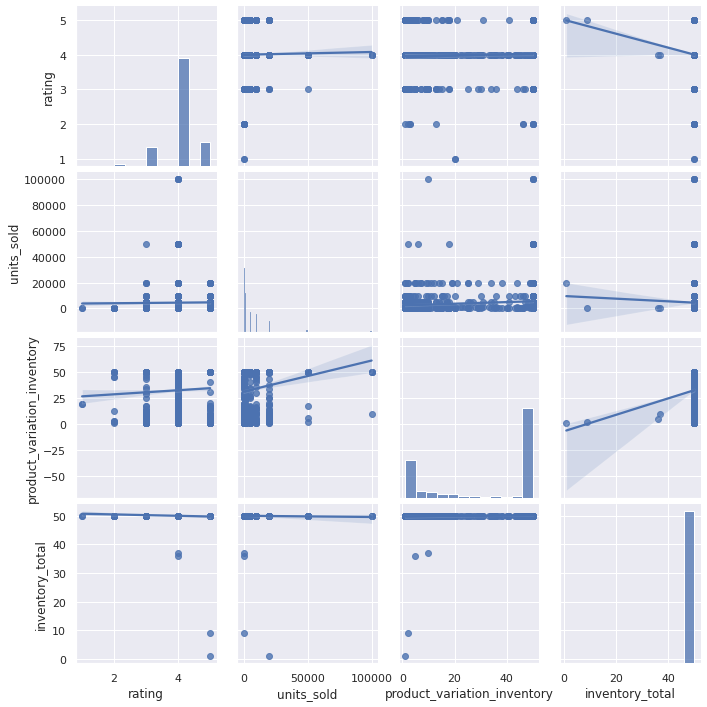

In [48]:
inventory=df2[['rating','units_sold','product_variation_inventory','inventory_total']]
plt.figure(figsize=(20,20))
sns.pairplot(data=inventory,kind='reg')
plt.show()

## **3.11 Tags Word Cloud**

In [49]:
from wordcloud import WordCloud

tags=[]

for x in df2['tags']:
    for word in str(x).split(sep=','):
        word=word.lower()
        tags.append(word)
tags[:10] 

['summer',
 'soildcolor',
 'plus size',
 'tank',
 'camisole',
 'tops',
 'loose',
 'tank top',
 "women's fashion",
 'fashion']

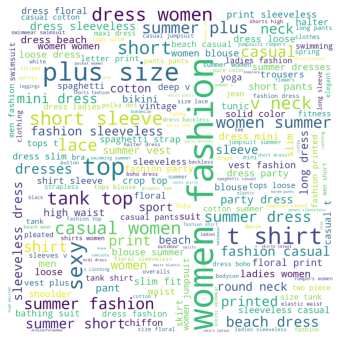

In [50]:
wordcloud = WordCloud( background_color='white',width=1600,height=1600).generate(" ".join(tags))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

> **OBSERVATION**:From the words clouds, we can see the most frequent words the merchants put in tags are "women", "fashion", "plus", "size", "sexy" and "shirt", ..etc

_________________
<h1 align="center"><span style='font-family:Georgia'> Feature Engineering</span></h1>

_________________

1. Handling Color Feature.

2. Handling Size Variation Feature.

3. Handling Size Origin Country Feature.

4. Handling Merchant info Feature.

5. Handling SizeUrgency text Feature.

6. Drop some Feature.


## **4.1 Handling `Color` feature**

In [51]:
def MapColors(color):

  blacks = ['Black','black','black & blue','black & green','black & white','blackwhite','coolblack']
  whites = ['White','offwhite','white','white & black']
  gray =   ['lightgray','gray','lightgray']
  pinks =  ['Pink','dustypink','lightpink','pink','pink & black','pink & blue','pink & grey','pink & white','floral','purple']
  reds =   ['RED','burgundy','claret','red','rose','rosegold','rosered','violet','watermelonred','wine','wine red','winered']
  oranges =['apricot','orange','orange-red']
  greens = ['applegreen','army','armygreen','fluorescentgreen','green','light green','lightgreen','mintgreen','white & green']
  blues =  ['blue & pink','blue','darkblue','darkgreen','denimblue','lakeblue','lightblue','navy','navy blue','navyblue','navyblue & white','skyblue']

  if color in blacks:
    return 'black'
  elif color in gray:
    return 'gray'
  elif color in whites:
    return 'white'
  elif color in pinks:
    return 'pink'
  elif color in reds:
    return 'red'
  elif color in oranges:
    return 'orange'
  elif color in greens:
    return 'green'
  elif color in blues:
    return 'blue'
  else:
    return 'others'

In [52]:
df2['product_color'] = df2['product_color'].apply(MapColors)
test_data['product_color'] = test_data['product_color'].apply(MapColors)

### **4.1.1 Rating per each color after mapping**

In [53]:
pd.crosstab(index=df2['rating'], columns=df2['product_color'])

product_color,black,blue,gray,green,orange,others,pink,red,white
rating,,,,,,,,,
1.0,0,2,0,0,0,0,0,0,0
2.0,3,1,0,1,0,2,1,0,4
3.0,17,20,0,11,3,23,19,18,24
4.0,166,89,7,74,14,141,81,73,129
5.0,47,12,0,15,2,46,19,7,22


### **4.1.2 Units sold per each color after mapping**


In [54]:
pd.crosstab(index =df2['units_sold'], columns=df2['product_color'])

product_color,black,blue,gray,green,orange,others,pink,red,white
units_sold,,,,,,,,,
1,0,1,0,1,1,0,0,0,0
2,0,0,0,0,0,2,0,0,0
7,0,0,0,0,1,0,0,0,0
8,0,1,0,0,0,0,0,0,3
10,10,5,0,2,0,5,7,0,8
50,5,10,1,7,2,13,6,1,9
100,73,38,2,44,6,71,36,34,48
1000,51,29,2,23,5,59,35,29,47
5000,30,15,2,12,2,24,13,16,25


In [55]:
colors = df2.groupby('product_color').sum('units_sold').reset_index()[['product_color','units_sold']]
colors

,product_color,units_sold
0,black,1388650
1,blue,458359
2,gray,12250
3,green,377771
4,orange,125708
5,others,986804
6,pink,453970
7,red,382450
8,white,757354


### **4.1.3 Check data Balance in color column**


In [56]:
color_balance = df2[['product_color']].groupby('product_color').value_counts()
color_balance

product_color
black     233
blue      124
gray        7
green     101
orange     19
others    212
pink      120
red        98
white     179
dtype: int64

In [57]:
fig=px.bar(data_frame=color_balance,width = 800, height = 400)
fig.update_layout(title='All color sales')
fig.show()


## **4.2 Handling `size variation` feature**


In [58]:
def MapSize(size):

  XS = ['Size-XS', 'Size-XXS', 'Size -XXS','XS','Size XXS', 'SIZE-XXS', 'SIZE XS', 'SIZE XXS','XXS' ,'XXXS','XS.']
  S = ['S','S.','S(bust 88cm)','26(Waist 72cm 28inch)','s','US-S','25-S','25-S','29','S/M(child)','25','S (waist58-62cm)','S..',
       'pants-S','Size S', 'Size-S','Suit-S', 'Size S.','size S', 'Size/S','SIZE S']
  M = ['M','M.','Size M']
  L = ['L','SizeL','35','34','33']
  xl_2xL = ['XL','XXL','X   L','2XL','1 PC - XL','Women Size 36']
  big_size = ['4XL','60','04-3XL','XXXXXL','6XL','XXXXL', 'Size-5XL', 'Size4XL','5XL']

  if size in XS:
    return 'xs'
  elif size in S:
    return 's'
  elif size in M:
    return 'm'
  elif size in L:
    return 'l'
  elif size in xl_2xL:
    return 'xl_2xL'
  elif size in big_size:
    return 'big_size'
  else: 
     return 'others'

In [59]:
df2['product_variation_size_id'] = df2['product_variation_size_id'].apply(MapSize)
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].apply(MapSize)

### **4.2.1 Rating per each size after mapping**

In [60]:
pd.crosstab(index=df2['rating'], columns=df2['product_variation_size_id'])


product_variation_size_id,big_size,l,m,others,s,xl_2xL,xs
rating,,,,,,,
1.0,0,0,0,0,0,0,2
2.0,0,0,0,0,6,1,5
3.0,1,0,7,6,64,8,49
4.0,8,31,119,23,347,17,229
5.0,4,5,15,16,67,3,60


### **4.2.2 Units sold per each size after mapping**


In [61]:
pd.crosstab(columns=df2['units_sold'], index=df2['product_variation_size_id'])


units_sold,1,2,7,8,10,50,100,1000,5000,10000,20000,50000,100000
product_variation_size_id,,,,,,,,,,,,,
big_size,0,0,0,0,1,0,9,0,0,3,0,0,0
l,0,0,0,0,0,0,9,10,6,4,6,1,0
m,0,0,0,0,1,0,38,37,21,22,18,2,2
others,0,1,0,0,3,0,11,15,5,6,4,0,0
s,0,1,0,3,19,19,120,132,73,68,40,7,2
xl_2xL,0,0,0,0,1,0,12,7,3,3,2,1,0
xs,3,0,1,1,12,35,153,79,31,19,9,1,1


### **4.2.3 Check data Balance in size column**

In [62]:
colors = df2.groupby('product_variation_size_id').sum('units_sold').reset_index()[['product_variation_size_id','units_sold']]
colors

,product_variation_size_id,units_sold
0,big_size,30910
1,l,250900
2,m,1025810
3,others,181132
4,s,2540166
5,xl_2xL,143210
6,xs,771188


In [63]:
size_balance = df2[['product_variation_size_id']].groupby('product_variation_size_id').value_counts()
size_balance

product_variation_size_id
big_size     13
l            36
m           141
others       45
s           484
xl_2xL       29
xs          345
dtype: int64

In [64]:
fig=px.bar(data_frame=size_balance,width = 800, height = 400)
fig.update_layout(title='All size sales')
fig.show()


## **4.3 Handling `orgin country` feature**


In [65]:
df2.origin_country.value_counts()

CN    1053
US      22
0       12
VE       3
SG       2
GB       1
Name: origin_country, dtype: int64

In [66]:
def MapCountry(country):
    ls = ["CN", "US"]
    if country in ls:
      return country
    else:
        return "Others"

In [67]:
df2['origin_country'] = df2['origin_country'].apply(MapCountry)
test_data['origin_country'] = test_data['origin_country'].apply(MapCountry)

### **4.3.1 Rating per each country after mapping**

In [68]:
pd.crosstab(index=df2['rating'], columns=df2['origin_country'])


origin_country,CN,Others,US
rating,,,
1.0,2,0,0
2.0,9,2,1
3.0,132,0,3
4.0,743,16,15
5.0,167,0,3


### **4.3.2 Units sold per each country after mapping**


In [69]:
pd.crosstab(columns=df2['units_sold'], index=df2['origin_country'])


units_sold,1,2,7,8,10,50,100,1000,5000,10000,20000,50000,100000
origin_country,,,,,,,,,,,,,
CN,3,2,1,4,36,50,331,272,136,124,77,12,5
Others,0,0,0,0,0,2,10,2,1,1,2,0,0
US,0,0,0,0,1,2,11,6,2,0,0,0,0


### **4.3.3 Check data Balance in size column**

In [70]:
colors = df2.groupby('origin_country').sum('units_sold').reset_index()[['origin_country','units_sold']]
colors

,origin_country,units_sold
0,CN,4868006
1,Others,58100
2,US,17210


## **4.4 Handling `merchant info ` feature**


In [71]:
df2.merchant_info_subtitle

0        88 % avis positifs (66,644 notes)
1        91 % avis positifs (25,752 notes)
2         83 % avis positifs (3,897 notes)
3         87 % avis positifs (7,497 notes)
4           91 % avis positifs (173 notes)
                       ...                
1089    92 % avis positifs (230,951 notes)
1090                         (2,904 notes)
1091      78 % avis positifs (6,632 notes)
1092      83 % avis positifs (5,816 notes)
1093     86 % avis positifs (12,309 notes)
Name: merchant_info_subtitle, Length: 1093, dtype: object

In [72]:
def rgex(info):
  per = re.search(r'(\d+ ?%)', str(info))
  if per: 
     
    n = per.group().rstrip("%")
    return int(n)
  else: 
    return None

In [73]:
df2['merchant_info_subtitle'] = df2['merchant_info_subtitle'].apply(rgex)
test_data['merchant_info_subtitle'] = test_data['merchant_info_subtitle'].apply(rgex)

In [74]:
df2['merchant_info_subtitle'].isna().sum()

211

In [75]:
mu = df2['merchant_info_subtitle'].mean()
df2['merchant_info_subtitle'] = df2['merchant_info_subtitle'].fillna(mu)
df2['merchant_info_subtitle'].isna().sum()

0

In [76]:
mu = test_data['merchant_info_subtitle'].mean()
test_data['merchant_info_subtitle'] = test_data['merchant_info_subtitle'].fillna(mu)
test_data['merchant_info_subtitle'].isna().sum()

0

In [77]:
df3 = df2.rename(columns = {'merchant_info_subtitle':'merchant_pos_review'})
test_data = test_data.rename(columns = {'merchant_info_subtitle':'merchant_pos_review'})

## **4.5 Handling `urgency_text` feature**



In [78]:
df3.urgency_text.value_counts()


0                                   744
Quantité limitée !                  348
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [79]:
df3['urgency_text'] = df3['urgency_text'].apply(lambda x: 1 if x else 0)
test_data['urgency_text'] = test_data['urgency_text'].apply(lambda x: 1 if x else 0)

In [80]:
df3.urgency_text.value_counts()


0    744
1    349
Name: urgency_text, dtype: int64

## **4.6 Remove Some Feature**



In [81]:
df4 = df3.drop(['tags'], axis = 1)
test_data = test_data.drop('tags', axis = 1)

In [82]:
train_data['rating'].value_counts()

4.0    774
5.0    170
3.0    135
2.0     12
1.0      2
6.0      1
Name: rating, dtype: int64

### **4.6.1 Remove dependence column for naive bayes Model**

By removing the dependent variables, create a new dataset with a different feature combination.

In [83]:
train_data_v2 = df3.drop(['tags','merchant_rating_count','merchant_rating_count','badge_local_product','badge_product_quality', 'badge_fast_shipping'], axis = 1)
test_data_v2 = test_data.drop(['merchant_rating_count','merchant_rating_count','badge_local_product','badge_product_quality', 'badge_fast_shipping'], axis = 1)

_________________


<h1 align="center"><span style='font-family:Georgia'>Prepare Data For Machine Learning</span></h1>

_________________

## **5.1 Encoding Categorical Features**

In [84]:
def Encoding(df):
  df = pd.get_dummies(df, columns = ['product_color'],
                          prefix = "color",
                          drop_first = True)

  df = pd.get_dummies(df, columns = ["product_variation_size_id"],
                    prefix = "size",
                    drop_first = True)

  df = pd.get_dummies(df, columns = ["origin_country"],
                    prefix = "origin",
                    drop_first = True)
  return df

In [85]:
# Encode Training data for Decision Tree and Support Vector classifiers
train_data = Encoding(df4)
# Encode Training data version2 after dropping the correlated features
train_data_v2 = Encoding(train_data_v2)
# Encode Testing data 
test_data = Encoding(test_data)
# Encode Testing data version2
test_data_v2 = Encoding(test_data_v2)

## **5.2 Check Columns Distribution before normalization**

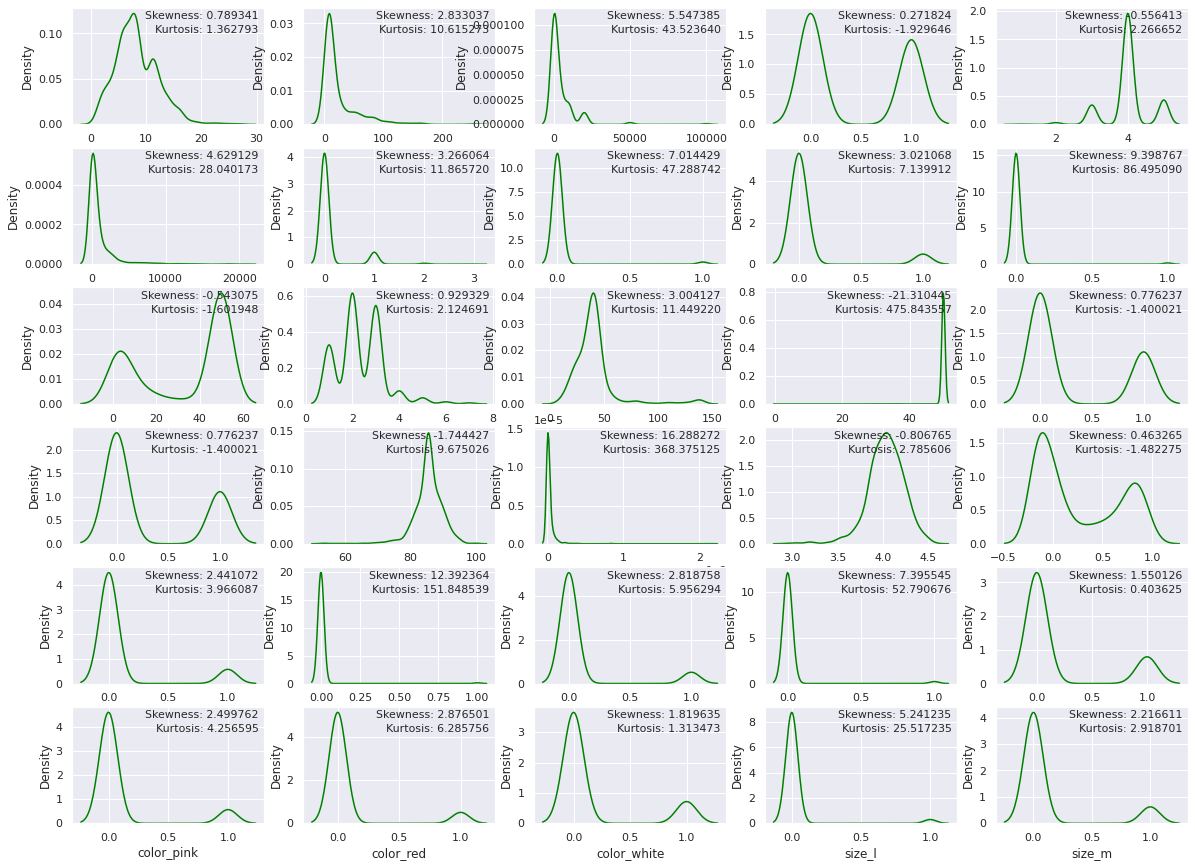

In [86]:
sns.set(rc={"figure.figsize":(20,15)})
fig, axs = plt.subplots(6,5)

for i, col in enumerate(train_data.columns):
  if i == 30: break
  else:
    sns.kdeplot(train_data[col],ax = axs[i//5,i%5], color = 'green')
    axs[i//5,i%5].text(x=0.97, y=0.97, transform=axs[i//5,i%5].transAxes, s="Skewness: %f" % train_data[col].skew(),\
        fontsize=11, verticalalignment='top', horizontalalignment='right')
    axs[i//5,i%5].text(x=0.97, y=0.85, transform=axs[i//5,i%5].transAxes, s="Kurtosis: %f" % train_data[col].kurt(),\
        fontsize=11, verticalalignment='top', horizontalalignment='right')

plt.show()

### **5.3 Check Outlier**  
The interquartile range method defines outliers as values larger than Q3 + 1.5 * IQR or the values smaller than Q1 – 1.5 * IQR.
<img src = '' width="700"> 



*   **Q1** = 25th quartile

*   **Q3** = 75th quartile

*   **IQR** =Q3 – Q1

*   **Inner Fence**: The inner fence would be set 1.5 x IQR below Quartile 1 (Q1) and 1.5 x IQR above Q3.
$$[Q1-1.5*IQR : Q3+1.5*IQR]$$


In [87]:
outliers = {}

for col in train_data.columns:
  feature = train_data[col].unique()
  q1, q3= np.percentile(feature,[25,75])
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * q1)
  upper_bound = q3 + (1.5 * q3)
  l = feature[(feature > upper_bound) | (feature < lower_bound)]
  if len(l) > 0:
    outliers[col] = l
outliers

{'price': array([19., 18., 15., 16., 22., 17., 25., 27., 23., 26., 20., 24.]),
 'retail_price': array([252, 250]),
 'units_sold': array([ 50000, 100000]),
 'rating_count': array([ 5641,  8904,  8029, 10150, 14568,  9330,  7596,  5759,  5254,
        12041,  5351, 13488,  8971,  5479,  6735, 18463, 13789,  6860,
        20744,  4874,  7773, 11408,  7022,  8164, 10927, 18393,  9207,
        11062,  6135,  5891,  5359,  5882,  5232,  6450,  7242,  8960,
         7753, 11913,  5929,  9337,  7088,  6742,  6510, 12880]),
 'merchant_rating_count': array([  66644,  253249,   59903,  126370,   90105,   70773,   87178,
         190918,   54504,   88193,  124563,  246312,  165915,  130598,
          65189,   47981,   53225,   67171,  102568,  839882,   61895,
          80093,   99800,   47356,   78616,   55089,   78307,   58068,
         402743,  320031,  139788,   91631,  110548,   55670,   73701,
          55499,  108048,   51369,  173992,  105015,  366898,  330405,
         139607,  151249,   

## **5.4 Normalization**

In [88]:
X = np.array(train_data.loc[:,train_data.columns != 'rating'])
y = np.array(train_data.loc[:,'rating'])
print(X.shape)
print(y.shape)

(1093, 35)
(1093,)


### **5.4.1 Normalization of Dataset Version1**


In [89]:
sc = MinMaxScaler()

sc.fit(X)
X = sc.transform(X)
test_std = sc.transform(np.array(test_data))

In [90]:
X_v2 = np.array(train_data_v2.loc[:,train_data_v2.columns != 'rating'])
y_v2 = np.array(train_data_v2.loc[:,'rating'])

### **5.4.2 Normalization of Dataset Version2**
This Dataset contain diffrent features after droping correlated columns

In [91]:
sc = MinMaxScaler()

sc.fit(X_v2)
X_v2 = sc.transform(X_v2)
test_std_v2 = sc.transform(np.array(test_data_v2))

### **5.5 Oversampled Dataset**
Using SMOTE To OverSample the Minority Class 

In [92]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=1)
X_v3, y_v3 = oversample.fit_resample(X,y)

_________________


<h1 align="center"><span style='font-family:Georgia'>MODELING</span></h1>

_________________

I Used Grid Search To SEarch for the best Hyperparameter for 4 diffrent algorithms (DT, CSV, NB, RF) with 3 diffrent dataset (2 diffrent combination of the features and an oversampled dataset using SMOTE)

## **6.1 Decsion Tree Classifier**

In [93]:
# Create the parameter grid based on the results of random search 
from sklearn.metrics import fbeta_score, make_scorer

params = {
    'max_depth': np.arange(5,20,1),
    'min_samples_leaf': [3,4,5,6,7],
    'max_features':[0.6,0.2,0.4,0.1,0.9],
    'criterion': ["gini", "entropy"],
}

# Create Decision Tree classifer object

f1_score = make_scorer(fbeta_score, beta=1)

grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=2), 
                       param_grid=params, n_jobs=-1, cv= 5, verbose=1, scoring = 'f1_weighted')

### **6.1.1 Decsion Tree Classifier with dataset version1**

In [94]:
# training
grid_dt.fit(X, y)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'max_features': [0.6, 0.2, 0.4, 0.1, 0.9],
                         'min_samples_leaf': [3, 4, 5, 6, 7]},
             scoring='f1_weighted', verbose=1)

In [95]:
dt1_params = grid_dt.best_params_
dt1 = grid_dt.best_estimator_
dt1

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features=0.9,
                       min_samples_leaf=3, random_state=2)

In [96]:
f1_score_dt1 = grid_dt.best_score_
f1_score_dt1

0.7439276320984078

### **6.1.2 Decsion Tree Classifier with dataset version2**

In [97]:
# training
grid_dt.fit(X_v2, y_v2)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'max_features': [0.6, 0.2, 0.4, 0.1, 0.9],
                         'min_samples_leaf': [3, 4, 5, 6, 7]},
             scoring='f1_weighted', verbose=1)

In [98]:
dt2_params = grid_dt.best_params_
dt2 = grid_dt.best_estimator_
dt2

DecisionTreeClassifier(max_depth=9, max_features=0.9, min_samples_leaf=4,
                       random_state=2)

In [99]:
f1_score_dt2 = grid_dt.best_score_
f1_score_dt2

0.7318577983474324

### **6.1.3 Decsion Tree Classifier with the oversampled dataset**

In [100]:
# training
grid_dt.fit(X_v3, y_v3)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'max_features': [0.6, 0.2, 0.4, 0.1, 0.9],
                         'min_samples_leaf': [3, 4, 5, 6, 7]},
             scoring='f1_weighted', verbose=1)

In [101]:
dt3_params = grid_dt.best_params_
dt3 = grid_dt.best_estimator_
dt3

DecisionTreeClassifier(criterion='entropy', max_depth=17, max_features=0.6,
                       min_samples_leaf=3, random_state=2)

In [102]:
f1_score_dt3 = grid_dt.best_score_
f1_score_dt3

0.87709219841622

## **6.2 Support Vector Classifier**

In [103]:
# defining parameter range
params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid_svc = GridSearchCV(SVC(), params, refit = True, cv= 5, verbose=1, scoring = 'f1_weighted')

### **6.2.1 Support Vector Classifier with datase1**

In [104]:
# training
grid_svc.fit(X, y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='f1_weighted', verbose=1)

In [105]:
svc1_params = grid_svc.best_params_
svc1 = grid_svc.best_estimator_
svc1

SVC(C=1000, gamma=0.01)

In [106]:
f1_score_svc1 = grid_svc.best_score_
f1_score_svc1

0.6471759301879091

### **6.2.2 Support Vector Classifier with dataset version2**

In [107]:
# training
grid_svc.fit(X_v2, y_v2)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='f1_weighted', verbose=1)

In [108]:
svc2_params = grid_svc.best_params_
svc2 = grid_svc.best_estimator_
svc2

SVC(C=100, gamma=0.1)

In [109]:
f1_score_svc2 = grid_svc.best_score_
f1_score_svc2

0.6343910942574515

### **6.2.3 Support Vector Classifier with the oversampled dataset**

In [110]:
# training
grid_svc.fit(X_v3, y_v3)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='f1_weighted', verbose=1)

In [111]:
svc3_params = grid_svc.best_params_
svc3 = grid_svc.best_estimator_
svc3

SVC(C=1000, gamma=1)

In [112]:
f1_score_svc3 = grid_svc.best_score_
f1_score_svc3

0.938299507300808

## **6.3 Naive Bayes Classifier**

In [113]:
# Build a Gaussian Classifier
params = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_nb = GridSearchCV(estimator=GaussianNB(), param_grid=params, cv=5, verbose=1, scoring='f1_weighted')

### **6.3.1 Naive Bayes Classifier with dataset version1**

In [114]:
# training
grid_nb.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1_weighted', verbose=1)

In [115]:
nb1_params = grid_nb.best_params_
nb1 = grid_nb.best_estimator_
nb1

GaussianNB(var_smoothing=0.3511191734215131)

In [116]:
f1_score_nb1 = grid_nb.best_score_
f1_score_nb1

0.6401157717141807

### **6.3.2 Naive Bayes Classifier with dataset version2**

In [117]:
# training
grid_nb.fit(X_v2, y_v2)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1_weighted', verbose=1)

In [118]:
nb2_params = grid_nb.best_params_
nb2 = grid_nb.best_estimator_
nb2

GaussianNB(var_smoothing=0.1873817422860384)

In [119]:
f1_score_nb2 = grid_nb.best_score_
f1_score_nb2

0.6094279366409399

### **6.3.3 Naive Bayes Classifier with the oversampled dataset**

In [120]:
# training
grid_nb.fit(X_v3, y_v3)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1_weighted', verbose=1)

In [121]:
nb3_params = grid_nb.best_params_
nb3 = grid_nb.best_estimator_
nb3

GaussianNB(var_smoothing=2.848035868435805e-09)

In [122]:
f1_score_nb3 = grid_nb.best_score_
f1_score_nb3

0.5784033588933262

## **6.4 Random Forest Classifier**

In [123]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators' : list(range(10,101,10)),
          'max_features' : list(range(6,32,5))}


# Create grid search object

grid_rf = GridSearchCV(RandomForestClassifier(),param_grid = params, cv = 5, verbose=3, n_jobs=-1)

### **6.4.1 Random Forest Classifier with dataset version1**

In [124]:
# training
grid_rf.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [6, 11, 16, 21, 26, 31],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=3)

In [125]:
rf1_params = grid_rf.best_params_
rf1 = grid_rf.best_estimator_
rf1

RandomForestClassifier(max_features=26, n_estimators=50)

In [126]:
f1_score_rf1 = grid_rf.best_score_
f1_score_rf1

0.80880566377613

### **6.4.2 Random Forest Classifier with dataset version2**

In [127]:
# training
grid_rf.fit(X_v2, y_v2)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [6, 11, 16, 21, 26, 31],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=3)

In [128]:
rf2_params = grid_rf.best_params_
rf2 = grid_rf.best_estimator_
rf2

RandomForestClassifier(max_features=16, n_estimators=70)

In [129]:
f1_score_rf2 = grid_rf.best_score_
f1_score_rf2

0.807871475849357

### **6.4.3 Random Forest Classifer With the oversampled dataset**

In [132]:
grid_rf.fit(X_v3, y_v3)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [6, 11, 16, 21, 26, 31],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=3)

In [133]:
rf3_params = grid_rf.best_params_
rf3 = grid_rf.best_estimator_
rf3

RandomForestClassifier(max_features=6)

In [134]:
f1_score_rf3 = grid_rf.best_score_
f1_score_rf3

0.9478036175710594

________________
<h1 align="center"><span style='font-family:Georgia'> Conclusion</span></h1>

_________________

In [135]:
dict_ = {'hparams_v1': [dt1_params.values(),svc1_params.values(),nb1_params.values(),rf1_params.values()], # Hyperparameters of the models trained on dataset v1
          'F1_score_v1':[f1_score_dt1,f1_score_svc1,f1_score_nb1,f1_score_rf1], # results of v1 dataset 
                        
          'hparams_v2': [dt2_params.values(),svc2_params.values(),nb2_params.values(),rf2_params.values()], # Hyperparameters of the models trained on dataset v2
          'F1_score_v2':[f1_score_dt2,f1_score_svc2,f1_score_nb2,f1_score_rf2], # results of v2 dataset
                        
          'hparams_v3': [dt3_params.values(),svc3_params.values(),nb3_params.values(),rf3_params.values()], # Hyperparameters of the models trained on dataset v3
          'F1_score_v3':[f1_score_dt3,f1_score_svc3,f1_score_nb3,f1_score_rf3] # results of v3 dataset
                       } 
                        
results = pd.DataFrame(dict_, index = ['DT', 'SVC', 'NB','RF'] )# Classifiers' Names)

results

,hparams_v1,F1_score_v1,hparams_v2,F1_score_v2,hparams_v3,F1_score_v3
DT,"(entropy, 9, 0.9, 3)",0.743928,"(gini, 9, 0.9, 4)",0.731858,"(entropy, 17, 0.6, 3)",0.877092
SVC,"(1000, 0.01, rbf)",0.647176,"(100, 0.1, rbf)",0.634391,"(1000, 1, rbf)",0.938300
NB,(0.3511191734215131),0.640116,(0.1873817422860384),0.609428,(2.848035868435805e-09),0.578403
RF,"(26, 50)",0.808806,"(16, 70)",0.807871,"(6, 100)",0.947804


> **As slown in the results above** (F1-score based on validation data using grid search):

1. Performance differs slightly between datasets v1 and v2.
1. Naive Bayes is the worst classifer due to the dependance between the features.
2. Random Forest and Support vector classifer are better than Decsion Tree.
3. Seems that all the model have higher generalization error by using the oversampled dataset (dataset v3).
1. I will choose RF1 as the best model because it has the lowest generaization error 

________________
<h1 align="center"><span style='font-family:Georgia'> Submission File </span></h1>

_________________

In [136]:
res = pd.DataFrame()
res['id'] = id_col

def save_submission(model, test):
  res['rating'] = model.predict(test_std)
  submission = res[['id','rating']]
  submission.to_csv(f"submission5.csv", index=False)
  return submission

In [137]:
best_model = rf1
submission = save_submission(best_model, test_std)
submission['rating'].value_counts()

4.0    403
3.0     41
5.0     34
2.0      1
Name: rating, dtype: int64